## **DRIVE MOUNT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML/ETH

/content/drive/MyDrive/ML/ETH


### **GET WEATHER**

In [ ]:
import os
print(os.getcwd())
os.chdir("//content//drive//MyDrive//ML//ETH")
if not os.path.isdir(".//weather"):
  os.mkdir(".//weather")
os.chdir(".//weather")
print(os.getcwd())

In [ ]:
import requests
from requests.auth import HTTPBasicAuth

YEARS = [2022,2023]
MONTHS = range(1,13)
DAYS = range(1,32)

for year in YEARS:
  for month in MONTHS:
    for day in DAYS:

      filename = f"{year:04d}-{month:02d}-{day:02d}.dat"
      url = f"https://iacweb.ethz.ch/data/meteostation/hberg/IAC-Met-HBerg_{filename}"
      resp = requests.get(url, auth = HTTPBasicAuth('user', 'meteo')) # making requests to server
      if resp.status_code != 404:
        print(filename)
        with open(filename, "wb") as f: # opening a file handler to create new file 
            f.write(resp.content) # writing content to file


### **LOAD WEATHER**

In [21]:
import os
if os.getcwd() != "//content//drive//MyDrive//ML//ETH//weather":
  os.chdir("//content//drive//MyDrive//ML//ETH//weather")
print(os.getcwd())

/content/drive/MyDrive/ML/ETH/weather


2022-01-03.dat 0 490 9.06
2022-01-03.dat 0 500 9.1
2022-01-03.dat 500 520 9.63
2022-01-03.dat 520 540 9.5
2022-01-07.dat 360 390 -1.48
2022-02-26.dat 0 99999 -320.0
2022-02-26.dat ['99999', '99999.00', '-320.00', '-320.00', '-320.00', '4.69', '-9999.00', '0.00', '9999.00', '99999.00', '99999.00', '99999.00', '99999.00', '99999.00', '99999.00', '9999', '8000', '0', '9999']
2022-02-26.dat 0 99999 -320.0
2022-02-26.dat ['99999', '99999.00', '-320.00', '-320.00', '-320.00', '4.69', '-9999.00', '0.00', '9999.00', '99999.00', '99999.00', '99999.00', '99999.00', '99999.00', '99999.00', '9999', '8000', '0', '9999']
2022-02-26.dat ['10', '967.46', '-320.00', '-320.00', '-320.00', '4.73', '627.00', '0.00', '1.30', '1.89', '45.00', '4.70', '89.00', '0.92', '0.92', '0', '8000', '0', '0']
2022-02-27.dat 0 770 -1.37
2022-02-27.dat 0 780 -1.63
2022-02-28.dat 360 390 -3.36
2022-03-09.dat 340 360 -3.39
2022-03-11.dat 340 360 -0.77
2022-04-05.dat 280 330 4.37
2022-04-06.dat ['1350', '943.20', '-320.00',

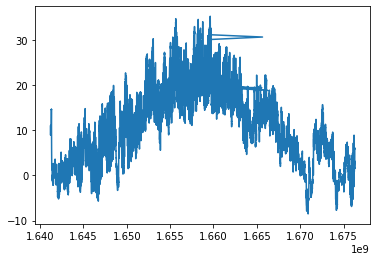

In [43]:
import time
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

YEARS = [2022,2023]
MONTHS = range(1,13)
DAYS = range(1,32)



data =[]

for year in YEARS:
  for month in MONTHS:
    for day in DAYS:
      filename = f"{year:04d}-{month:02d}-{day:02d}.dat"
      if os.path.isfile(filename ):
        dt = datetime.datetime(year=year, month=month, day=day)
        seconds = time.mktime(dt.timetuple())
        
        with open(filename, "r") as f: # opening a file handler to create new file 
          lines = f.readlines()[44:] 
          t_prev=0
          for i, line in enumerate(lines):
            line_split = line.split()
            if len(line_split) == 19:
              t = int(line_split[0])
              T_air = float(line_split[2])


              if i==0 and t!=0:
                print(filename,t_prev, t , T_air)
                t_prev=0
              elif i!=0 and t > t_prev+10:
                print(filename,t_prev, t, T_air )
                t_prev=int(line_split[0])
              else: 
                t_prev = int(line_split[0])

              if T_air>-50:
               data.append([t*60.0+seconds, T_air ])
              else:
                print(filename, line_split)



plt.plot([d[0] for d in data], [d[1] for d in data])

plt.show()

